
# 线性分类练习

![A subset of the MNIST dataset](http://upload-images.jianshu.io/upload_images/1791718-7b8c408b7ee473f9.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


试着来用 TensorFlow 来对 MNIST 数据集中的手写数字 0, 1
和 2进行分类。
上图是你训练数据的示意。
你会注意到有些 1是在顶部有不同角度的[serif（衬线体）](https://en.wikipedia.org/wiki/Serif)。
这些相同点和不同点对构建模型的权重会有影响。

![左: label为0的权重。中: label是 1的权重。 右: label为2的权重。](http://upload-images.jianshu.io/upload_images/1791718-76e247f7a4185c64.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

上图是每个 label (0, 1和 2) 训练得到的权重。
权重显示了他们找到的每个数字的独特性。用MNIST来训练你的权重，完成这个练习。

## 说明
1. 打开 quiz.py
    1. 实现 get_weights 让它返回一个 tf.Variable 的权重
    2. 实现 get_biases 返回一个 tf.Variable 偏差
    3. 实现 xW + b，线性函数
2. 打开 sandbox.py
    1. 初始化权重

因为xW + b中的 xW是矩阵相乘，所以你要用 tf.matmul() 函数，而不是 tf.multiply()。不要忘记矩阵相乘的规则 tf.matmul(a,b) 不等于tf.matmul(b,a)。

#### `quiz.py`

In [ ]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return weights

def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return bias


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return y


#### `quiz_solution.py`

In [ ]:
# Solution is available in the other "quiz_solution.py" tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))
    return weights


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    bias = tf.Variable(tf.zeros(n_labels))
    return bias


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    y = tf.add(tf.matmul(input, w), b)
    return y

#### `sandbox_solution.py`

In [ ]:
# Solution is available in the other "sandbox_solution.py" tab
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    # TODO: Initialize session variables
    init = tf.global_variables_initializer()
    session.run(init)
    
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

# TensorFlow Softmax
The softmax 函数可以把它的输入，通常被称为 logits 或者 logit scores，处理成 0 到 1 之间，并且能够把输出归一化到和为 1。这意味着 softmax 函数与分类的概率分布等价。它是一个网络预测多酚类问题的最佳输出激活函数。

![](http://upload-images.jianshu.io/upload_images/1791718-0f801cc0451ea7d8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## TensorFlow Softmax

当我们用 TensorFlow 来构建一个神经网络时，相应地，它有一个计算 softmax 的函数。

In [11]:
# Solution is available in the other "solution.py" tab
import numpy as np


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # TODO: Compute and return softmax(x)
    exp = np.exp(x)
    return exp / np.sum(exp, axis=0)


logits = [3.0, 1.0, 0.2]
print(softmax(logits))

[ 0.8360188   0.11314284  0.05083836]


# One-Hot Encoding

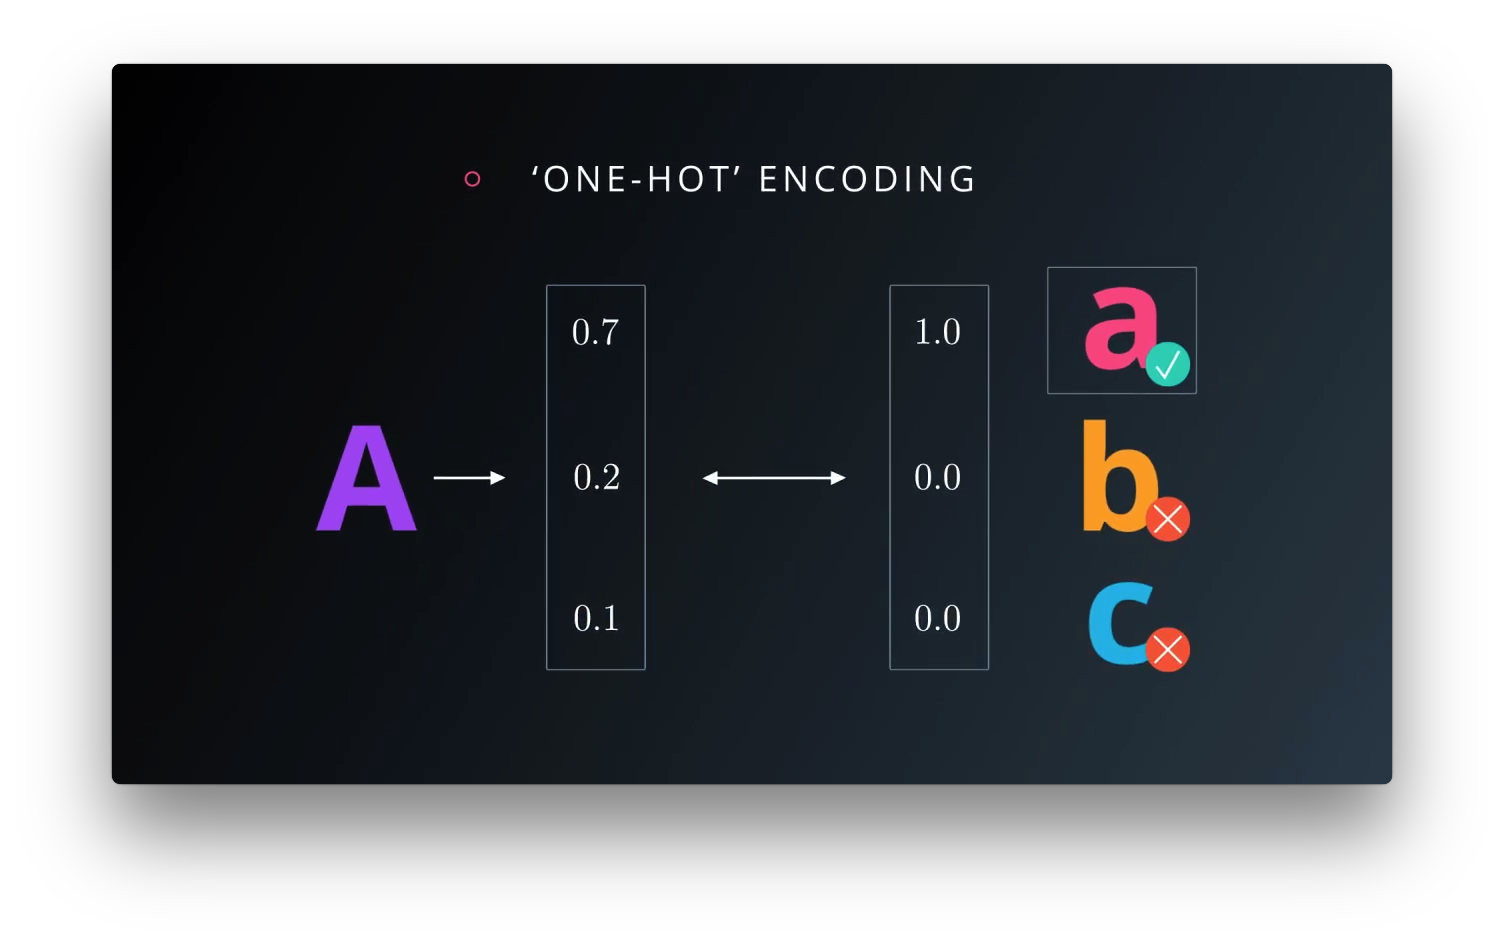
## 用 Scikit-Learn 实现 One-Hot Encoding

scikit-learn 的 LabelBinarizer 函数可以很方便地把你的目标（labels）转化成独热编码向量。请看：


In [12]:
import numpy as np
from sklearn import preprocessing

# Example labels 示例labels
labels = np.array([1,5,3,2,1,4,2,1,3])

# Create the encoder 创建编码器
lb = preprocessing.LabelBinarizer()

# Here the encoder finds the classes and assigns one-hot vectors 
# 编码器找到类别并分配 one-hot 向量
lb.fit(labels)

# And finally, transform the labels into one-hot encoded vectors
# 最后把目标（lables）转换成独热编码的（one-hot encoded）向量
lb.transform(labels)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

# TensorFlow 中的交叉熵（Cross Entropy）
与 softmax 一样，TensorFlow 也有一个函数可以方便地帮我们实现交叉熵。

![](http://upload-images.jianshu.io/upload_images/1791718-e7dd7438bc97b950.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

创建一个交叉熵函数，你需要用到这两个新的函数：

[tf.reduce_sum()](https://www.tensorflow.org/api_docs/python/tf/reduce_sum)

[tf.log()](https://www.tensorflow.org/api_docs/python/tf/log)
#### Reduce Sum
```python
x = tf.reduce_sum([1, 2, 3, 4, 5]) # 15
```
[tf.reduce_sum()](https://www.tensorflow.org/api_docs/python/tf/reduce_sum) 函数输入一个序列，返回他们的和。

#### Natural Log
```python
x = tf.log(100) # 4.60517
```
[tf.log()](https://www.tensorflow.org/api_docs/python/tf/log) 所做跟你所想的一样，它返回所输入值的自然对数。

In [28]:
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))

# todo: print crossentropy from session
with tf.Session() as sess:
    output = sess.run(cross_entropy, feed_dict={softmax:softmax_data, one_hot:one_hot_data})
    print (output)

0.356675


# Mini-batching

Mini-batching是一个一次训练数据集的一小部分，而不是整个训练集的技术。它可以使得内存较小，不能同时训练整个数据集的电脑也可以训练模型。

Mini-batching 从运算角度来说是低效的，因为你不能在所有样本中计算 loss。但是这点小代价也比根本不能跑模型要划算。

它跟随机梯度下降（SGD）和在一起用也很有帮助。办法是在每一代训练之前，对数据进行随机shuffle，然后创建 mini-batches ，对每一个 mini-batch，用梯度下降训练网络权重。因为这些 batches 是随机的，你其实是在对的每一个 batch 做随机梯度下降（SGD）。

让我们看看你的机器能否训练出 MNIST 数据集的权重和偏置项。


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

### 问题三
对features 和 labels实现一个 batches 函数。这个函数返回每个有最大batch_size数据点的 batch。下面有例子来说明一个示例batches函数的输出是什么。

In [35]:
# 4 个特征
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 个label
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]

example_batches = batches(3, example_features, example_labels)
example_batches

[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]

`example_batches` 变量如下：

In [34]:
[
    # 分2 个 batches:
    #   第一个 batch 的 size 是 3
    #   第二个 batch 的 size 是 1
    [
        # size 为 3 的第一个Batch
        [
            # 3 个特征样本
            # 每个样本有四个特征
            ['F11', 'F12', 'F13', 'F14'],
            ['F21', 'F22', 'F23', 'F24'],
            ['F31', 'F32', 'F33', 'F34']
        ], [
            # 3 个标签样本
            # 每个标签有两个label.
            ['L11', 'L12'],
            ['L21', 'L22'],
            ['L31', 'L32']
        ]
    ], [
        # size 为 1 的第二个 Batch 
        # 因为 batch size 是 3。所以四个样品中只有一个在这里。
        [
            # 1 一个样本特征
            ['F41', 'F42', 'F43', 'F44']
        ], [
            # 1 个label
            ['L41', 'L42']
        ]
    ]
]

[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]

#### `sandbox.py`

In [ ]:
from quiz import batches
from pprint import pprint

# 4 Samples of features
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 Samples of labels
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]

# PPrint prints data structures like 2d arrays, so they are easier to read
pprint(batches(3, example_features, example_labels))

#### `quiz.py`

In [ ]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # TODO: Implement batching
    output_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
        
    return output_batches

#### `quiz_solution.py`

In [32]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # TODO: Implement batching
    num_batch = math.ceil(len(features) / float(batch_size))
    batches = []
    for i in range(num_batch):
        batch = []
        feature_batch = []
        label_batch = []
        for j in range(batch_size):
            index = i * batch_size + j
            if index >= len(features):
                break

            feature_batch.append(features[index])
            label_batch.append(labels[index])
        batch.append(feature_batch)
        batch.append(label_batch)
        batches.append(batch)

    return batches

## Epochs （代）
一个 epoch（代）是指整个数据集正向反向训练一次。它被用来提示模型的准确率并且不需要额外数据。本节我们将讲解 TensorFlow 里的 epochs，以及如何选择正确的 epochs。

下面是训练一个模型 10 代的 TensorFlow 代码

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
#from helper import batches  # Helper function created in Mini-batching section


def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))
    
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 10
learn_rate = 0.001

train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Running the code will output the following:

```
Epoch: 0    - Cost: 11.0     Valid Accuracy: 0.204
Epoch: 1    - Cost: 9.95     Valid Accuracy: 0.229
Epoch: 2    - Cost: 9.18     Valid Accuracy: 0.246
Epoch: 3    - Cost: 8.59     Valid Accuracy: 0.264
Epoch: 4    - Cost: 8.13     Valid Accuracy: 0.283
Epoch: 5    - Cost: 7.77     Valid Accuracy: 0.301
Epoch: 6    - Cost: 7.47     Valid Accuracy: 0.316
Epoch: 7    - Cost: 7.2      Valid Accuracy: 0.328
Epoch: 8    - Cost: 6.96     Valid Accuracy: 0.342
Epoch: 9    - Cost: 6.73     Valid Accuracy: 0.36 
Test Accuracy: 0.3801000118255615
```

每个 epoch 都试图走向一个低cost，得到一个更好的准确率。

This model continues to improve accuracy up to Epoch 9. Let's increase the number of epochs to 100. 模型直到 Epoch 9 准确率都一直有提升，让我们把 epochs 的数字提高到 100。

```
...
Epoch: 79   - Cost: 0.111    Valid Accuracy: 0.86
Epoch: 80   - Cost: 0.11     Valid Accuracy: 0.869
Epoch: 81   - Cost: 0.109    Valid Accuracy: 0.869
....
Epoch: 85   - Cost: 0.107    Valid Accuracy: 0.869
Epoch: 86   - Cost: 0.107    Valid Accuracy: 0.869
Epoch: 87   - Cost: 0.106    Valid Accuracy: 0.869
Epoch: 88   - Cost: 0.106    Valid Accuracy: 0.869
Epoch: 89   - Cost: 0.105    Valid Accuracy: 0.869
Epoch: 90   - Cost: 0.105    Valid Accuracy: 0.869
Epoch: 91   - Cost: 0.104    Valid Accuracy: 0.869
Epoch: 92   - Cost: 0.103    Valid Accuracy: 0.869
Epoch: 93   - Cost: 0.103    Valid Accuracy: 0.869
Epoch: 94   - Cost: 0.102    Valid Accuracy: 0.869
Epoch: 95   - Cost: 0.102    Valid Accuracy: 0.869
Epoch: 96   - Cost: 0.101    Valid Accuracy: 0.869
Epoch: 97   - Cost: 0.101    Valid Accuracy: 0.869
Epoch: 98   - Cost: 0.1      Valid Accuracy: 0.869
Epoch: 99   - Cost: 0.1      Valid Accuracy: 0.869
Test Accuracy: 0.8696000006198883
```
从上述输出来看，在 epoch 80 的时候，模型的验证准确率就不提升了。让我们看看提升学习率会怎样。

`learn_rate = 0.1`

```
Epoch: 76   - Cost: 0.214    Valid Accuracy: 0.752
Epoch: 77   - Cost: 0.21     Valid Accuracy: 0.756
Epoch: 78   - Cost: 0.21     Valid Accuracy: 0.756
...
Epoch: 85   - Cost: 0.207    Valid Accuracy: 0.756
Epoch: 86   - Cost: 0.209    Valid Accuracy: 0.756
Epoch: 87   - Cost: 0.205    Valid Accuracy: 0.756
Epoch: 88   - Cost: 0.208    Valid Accuracy: 0.756
Epoch: 89   - Cost: 0.205    Valid Accuracy: 0.756
Epoch: 90   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 91   - Cost: 0.207    Valid Accuracy: 0.756
Epoch: 92   - Cost: 0.204    Valid Accuracy: 0.756
Epoch: 93   - Cost: 0.206    Valid Accuracy: 0.756
Epoch: 94   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 95   - Cost: 0.2974   Valid Accuracy: 0.756
Epoch: 96   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 97   - Cost: 0.2996   Valid Accuracy: 0.756
Epoch: 98   - Cost: 0.203    Valid Accuracy: 0.756
Epoch: 99   - Cost: 0.2987   Valid Accuracy: 0.756
Test Accuracy: 0.7556000053882599
```

看来学习率提升的太多了，最终准确率更低了。准确率也更早的停止了改进。我们还是用之前的学习率，把 epochs 改成 80

```
Epoch: 65   - Cost: 0.122    Valid Accuracy: 0.868
Epoch: 66   - Cost: 0.121    Valid Accuracy: 0.868
Epoch: 67   - Cost: 0.12     Valid Accuracy: 0.868
Epoch: 68   - Cost: 0.119    Valid Accuracy: 0.868
Epoch: 69   - Cost: 0.118    Valid Accuracy: 0.868
Epoch: 70   - Cost: 0.118    Valid Accuracy: 0.868
Epoch: 71   - Cost: 0.117    Valid Accuracy: 0.868
Epoch: 72   - Cost: 0.116    Valid Accuracy: 0.868
Epoch: 73   - Cost: 0.115    Valid Accuracy: 0.868
Epoch: 74   - Cost: 0.115    Valid Accuracy: 0.868
Epoch: 75   - Cost: 0.114    Valid Accuracy: 0.868
Epoch: 76   - Cost: 0.113    Valid Accuracy: 0.868
Epoch: 77   - Cost: 0.113    Valid Accuracy: 0.868
Epoch: 78   - Cost: 0.112    Valid Accuracy: 0.868
Epoch: 79   - Cost: 0.111    Valid Accuracy: 0.868
Epoch: 80   - Cost: 0.111    Valid Accuracy: 0.869
Test Accuracy: 0.86909999418258667
```

准确率只到 0.86。这有可能是学习率太高造成的。降低学习率需要更多的 epoch，但是可以最终得到更好的准确率。


# TensorFlow Lab


## Windows 指导

我们提供了一个 Conda 环境配置文件，这样你可以很方便的安装各种包，在 [intro-to-tensorflow](https://github.com/udacity/deep-learning/tree/master/intro-to-tensorflow) 目录中，键入

```
conda env create -f environment_win.yml

```

它将帮你创建一个叫 `dlnd-tf-lab` 的虚拟环境，进入这个环境，只要键入

```
activate dlnd-tf-lab

```

所有需要的包就都装好了。

## OS X 和 Linux 指导

我们提供了一个 Conda 环境配置文件，这样你可以很方便的安装各种包，在 [intro-to-tensorflow](https://github.com/udacity/deep-learning/tree/master/intro-to-tensorflow) 目录中，键入

```
conda env create -f environment.yml

```

它将帮你创建一个叫 `dlnd-tf-lab` 的虚拟环境，进入这个环境，只要键入

```
source activate dlnd-tf-lab

```

所有需要的包就都装好了。


你会看到 `intro_to_tensorflow.ipynb`，这就是你要练习的 notebook。它有三个问题需要你解决：

- 问题一：对特征归一化
- 问题二：用 TensorFlow 创建特征，目标，权重和偏置项 tensors。
- 问题三：调整学习率，epochs 和 batch size来获取最高准确率
